### 텍스트 마이닝 실습!
- 한글 영화 리뷰 데이터셋 -> 긍/부정 분류기, 감정분석(긍정과 부정에 영향을 주는 키워드들은 어떠한 것들이 있는지 분석!)

In [1]:
import numpy as np
import pandas as pd

In [2]:
text_train = pd.read_csv("./data/ratings_train.txt", delimiter = "\t")
text_test = pd.read_csv("./data/ratings_test.txt", delimiter = "\t")

In [3]:
text_train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [4]:
# 데이터 살펴보기
text_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [5]:
text_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [6]:
# 결측치가 존재함!
# 결측치 데이터를 확인!
text_train[text_train["document"].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [7]:
# 결측치 제거!
text_train.dropna(inplace=True)
text_test.dropna(inplace=True)

In [8]:
text_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [9]:
text_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


### 형태소 분석기 및 토큰화 다뤄보기
- 형태소 분석기 : konlpy
- 수치화 + 토큰화 : TF-IDF

#### TF-IDF(Term frequency-inverse document frequency)
- ex.자기소개서
- 개별 문서에서 자주 등장한 단어(ex.해외 경험, 사내 경험, 어린 시절...)에는 높은 가중치를 주되, 모든 문서에 자주 등장하는 단어(ex.나,제,저,는,가..)는 패널티를 주는 방식(단어의 중요도를 계산)
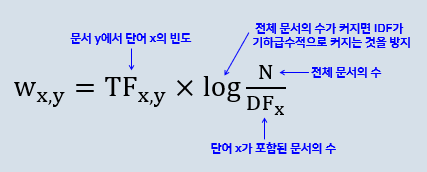png)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from konlpy.tag import Okt

In [11]:
# 형태소 분석기 생성
okt = Okt()

In [12]:
# 데이터셋이 너무 커서, 10000개만 활용보기!
text_trian2 = text_train[:10000]
text_test2 = text_test[:10000]

In [13]:
# BOW, TF-IDF는 기본적으로 "띄어쓰기" 단위로 토큰 및 수치화가 진행
# 토큰의 단위를 형태소 분석기로 응용해서 설정 가능!

# 토큰화 도구 만들기
def my_tokenizer(text) : 
    return okt.nouns(text)

In [14]:
# TF-IDF 객체(형태소 기준으로) 만들기
tfidf_okt = TfidfVectorizer(
    tokenizer = my_tokenizer, # 직접 만든 토크나이저(함수)를 지정하여 tfidf 객체 초기화(생성)
    token_pattern = None
)
# token_pattern : tfidf에서 사용되는 정규표현식(텍스트를 어떻게 단어 단위로 나눌지를 결정하는 규칙)
# 사용자 정의 토큰화 기준을 설정하면, 기존에 있던 token_pattern이 무시된다는 경고메세지 발생 -> None 설정하면 해결!

In [15]:
temp = pd.concat([text_trian2["document"], text_test2["document"]]) # 단어사전 만들기용 데이터셋

In [16]:
# 단어 사전 만들기!
tfidf_okt.fit(temp)

TfidfVectorizer(token_pattern=None,
                tokenizer=<function my_tokenizer at 0x00000264BAED5C60>)

In [17]:
# 단어 사전 확인
tfidf_okt.vocabulary_

{'더빙': 2674,
 '진짜': 11672,
 '목소리': 4266,
 '흠': 14517,
 '포스터': 13383,
 '보고': 5326,
 '초딩': 12110,
 '영화': 8645,
 '줄': 11390,
 '오버': 8773,
 '연기': 8525,
 '무재': 4418,
 '밓었': 4724,
 '다그': 2342,
 '래서': 3314,
 '추천': 12251,
 '교도소': 1020,
 '이야기': 9826,
 '구먼': 1064,
 '재미': 10518,
 '평점': 13346,
 '조정': 11138,
 '몬페': 4286,
 '의': 9618,
 '스파이더맨': 7134,
 '커스틴': 12479,
 '던스트': 2702,
 '막': 3810,
 '걸음': 480,
 '마': 3686,
 '세': 6563,
 '초등학교': 12108,
 '학년': 13701,
 '생인': 6315,
 '반개': 4872,
 '움': 9204,
 '원작': 9261,
 '긴장감': 1493,
 '제대로': 10998,
 '별': 5287,
 '욕': 9053,
 '이응경': 9868,
 '길용우': 1500,
 '생활': 6323,
 '년': 2106,
 '정말': 10872,
 '발': 4919,
 '해도': 13869,
 '그것': 1241,
 '납치': 2004,
 '감금': 175,
 '반복': 4894,
 '드라마': 3023,
 '가족': 95,
 '사람': 6016,
 '네': 2081,
 '액션': 8009,
 '몇': 4184,
 '왜케': 8977,
 '꽤': 1757,
 '볼': 5435,
 '데': 2716,
 '헐리우드': 14008,
 '인피니트': 10075,
 '짱': 11779,
 '볼때': 5445,
 '향수': 13969,
 '자극': 10245,
 '허진호': 13996,
 '감성': 190,
 '절제': 10807,
 '멜로': 4118,
 '달인': 2483,
 '울면': 9193,
 '손': 6761,
 '횡단보

#### TF-IDF + Okt를 사용해서 토큰화
- TfIdf + Logistic Regression 모델 결합 -> pipeline 활용

In [18]:
from sklearn.pipeline import make_pipeline # 기능 연결 도구
from sklearn.linear_model import LogisticRegression # 선형 분류 모델

In [19]:
# 파이프라인 객체 만들기
pipe_model = make_pipeline(
    TfidfVectorizer(
        tokenizer = my_tokenizer,
        token_pattern = None, 
        ngram_range = (1, 2) # 1-gram, 2-gram 활용
    ),
    LogisticRegression(max_iter = 10000)
)

In [20]:
# 데이터 분리
X_train = text_trian2["document"]
y_train = text_trian2["label"]
X_test = text_test2["document"]
y_test = text_test2["label"]

In [21]:
# 학습! (1만개 가량)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 2), token_pattern=None,
                                 tokenizer=<function my_tokenizer at 0x00000264BAED5C60>)),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [22]:
X_train

0                                     아 더빙.. 진짜 짜증나네요 목소리
1                       흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                       너무재밓었다그래서보는것을추천한다
3                           교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4       사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                              ...                        
9995    곰티비로 무료로 봤기때문에 5점주려고했는데 1 한국 공포영화의 특징인 깜놀시키려 하...
9996    이딴걸드라마라고썼냐 수습할수없으면걍친자녀아니면되고 간단하네 얼굴을바꿨으면 결말이라도...
9997                                왠지 김연아 크면 에리카처럼 될것같음.
9998            솔직히 굿 ㅋㅋㅋㅋ 넘버11씨는 살아남길 바랬는데 2번째극장판 어서 나오길
9999                                        그냥보다나옴 노답 핵노잼
Name: document, Length: 10000, dtype: object

In [23]:
pipe_model.predict(["이 영화 재밌어요!"])

array([1], dtype=int64)

In [24]:
pipe_model.predict(["노잼"])

array([0], dtype=int64)

In [25]:
pipe_model.score(X_test, y_test)

0.7391

### 긍/부정에 영향을 끼친 단어 살펴보기

In [26]:
tfidf = pipe_model.steps[0][1] # 학습한 TF-IDF 객체 지정
lr_clf = pipe_model.steps[1][1] # 학습한 Logi 모델 지정

In [27]:
# 단어 사전들을 인덱스 기반으로 정렬
df = pd.DataFrame([
    tfidf.vocabulary_.keys(), # 단어사전의 단어
    tfidf.vocabulary_.values() # 인덱스 번호(컬럼 번호)
]).T

df.columns = ["단어","인덱스"]
df.sort_values(by = "인덱스", inplace = True)

In [28]:
df["가중치"] = lr_clf.coef_[0] # 1D 형으로 컬럼을 추가할 수 있는데, 2차원으로 있어서 1차원 형변환을 위한 인덱싱!

In [29]:
df.sort_values(by = "가중치", inplace=True) # 차트로 그리기 전에 정렬!

In [30]:
bad = df.head(20)
good = df.tail(20)

In [31]:
# bad와 good을 한꺼번에 합치기
top20 = pd.concat([bad, good])

In [32]:
# 차트로 시각화
import matplotlib.pyplot as plt
from matplotlib import rc # 폰트설정 도구
rc('font', family = "Malgun Gothic")

# 마이너스 기호(-)가 표현되게끔 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

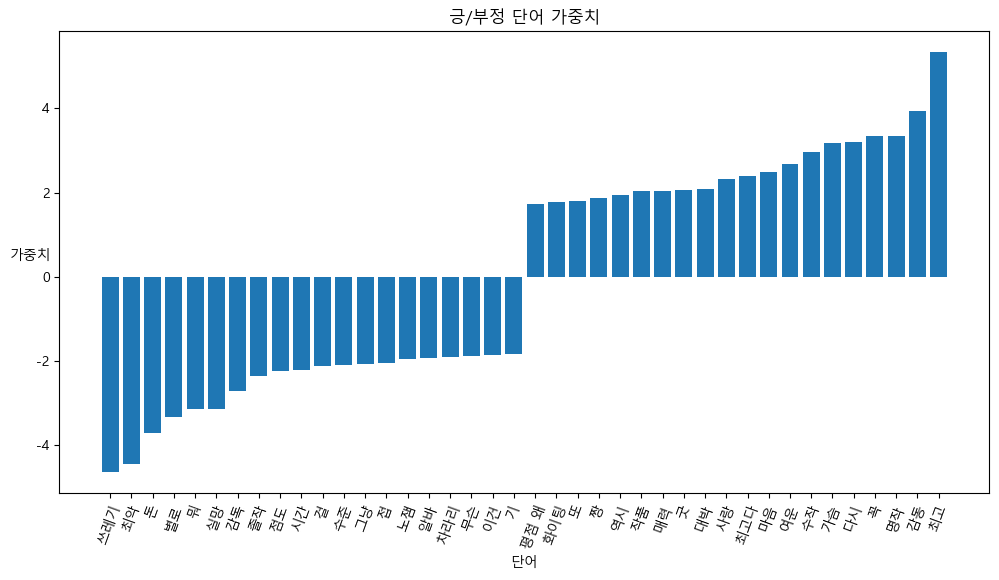

In [33]:
plt.figure(figsize=(12, 6))
plt.title("긍/부정 단어 가중치")
plt.xlabel("단어")
plt.ylabel("가중치", rotation = 0)
plt.bar(top20['단어'], top20["가중치"])
plt.xticks(rotation = 70)
plt.show()